In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sqlalchemy import create_engine

# Koneksi Database

In [2]:
dbname="order_management"
user="postgres"
password="admin"
host="localhost"
port="5432"

# Buat engine koneksi
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{dbname}')

# Query dari view
query = "SELECT * FROM tampilan_kinerja_penjualan_produk"

# Masukkan ke dataframe
dataset = pd.read_sql(query, engine)

dataset

,id_barang,nama_barang,kategori,harga_default,total_kuantitas_terjual,total_pendapatan_dihasilkan,harga_jual_rata_rata_per_unit
0,116,Mainan Bongkar Pasang Mobil,Mainan Edukasi,85000.0,12,1020000.0,85000.0
1,105,Puzzle Anak,Mainan Edukasi,45000.0,6,270000.0,45000.0
2,107,Balok Kayu Warna,Mainan Edukasi,80000.0,16,1280000.0,80000.0
3,101,Boneka Teddy Bear,Mainan,75000.0,26,1950000.0,75000.0
4,115,RC Car Jeep,Elektronik,275000.0,20,5500000.0,275000.0
5,114,Drone Mini,Elektronik,350000.0,38,13300000.0,350000.0
6,102,Mobil Hot Wheels,Mainan,50000.0,18,900000.0,50000.0
7,109,Mainan Masak-Masakan,Mainan,65000.0,47,3055000.0,65000.0
8,108,Kereta Thomas Mini,Mainan,40000.0,25,1000000.0,40000.0
9,112,Flashcard Binatang,Mainan Edukasi,30000.0,24,720000.0,30000.0


# Pre-processing

In [3]:
df = dataset.drop(columns=['id_barang', 'harga_jual_rata_rata_per_unit'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   nama_barang                  25 non-null     object 
 1   kategori                     25 non-null     object 
 2   harga_default                25 non-null     float64
 3   total_kuantitas_terjual      25 non-null     int64  
 4   total_pendapatan_dihasilkan  25 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.1+ KB


In [4]:
scaler = MinMaxScaler()

#df[['harga_default', 'total_kuantitas_terjual', 'total_pendapatan_dihasilkan']] = scaler.fit_transform(df[['harga_default', 'total_kuantitas_terjual', 'total_pendapatan_dihasilkan']])
df

,nama_barang,kategori,harga_default,total_kuantitas_terjual,total_pendapatan_dihasilkan
0,Mainan Bongkar Pasang Mobil,Mainan Edukasi,85000.0,12,1020000.0
1,Puzzle Anak,Mainan Edukasi,45000.0,6,270000.0
2,Balok Kayu Warna,Mainan Edukasi,80000.0,16,1280000.0
3,Boneka Teddy Bear,Mainan,75000.0,26,1950000.0
4,RC Car Jeep,Elektronik,275000.0,20,5500000.0
5,Drone Mini,Elektronik,350000.0,38,13300000.0
6,Mobil Hot Wheels,Mainan,50000.0,18,900000.0
7,Mainan Masak-Masakan,Mainan,65000.0,47,3055000.0
8,Kereta Thomas Mini,Mainan,40000.0,25,1000000.0
9,Flashcard Binatang,Mainan Edukasi,30000.0,24,720000.0


In [5]:
# plot distribusi data
def check_plot(df, variable):
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # probability plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

harga_default


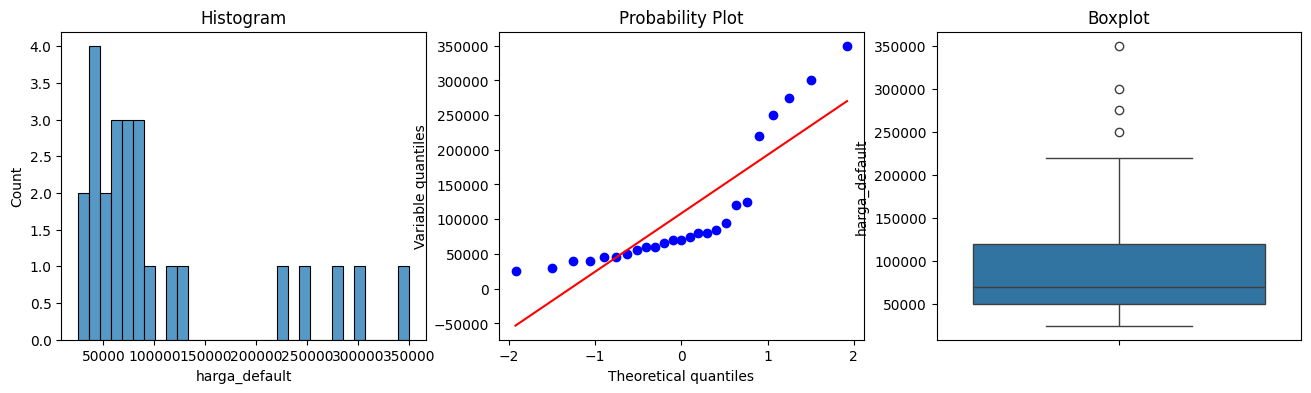

total_kuantitas_terjual


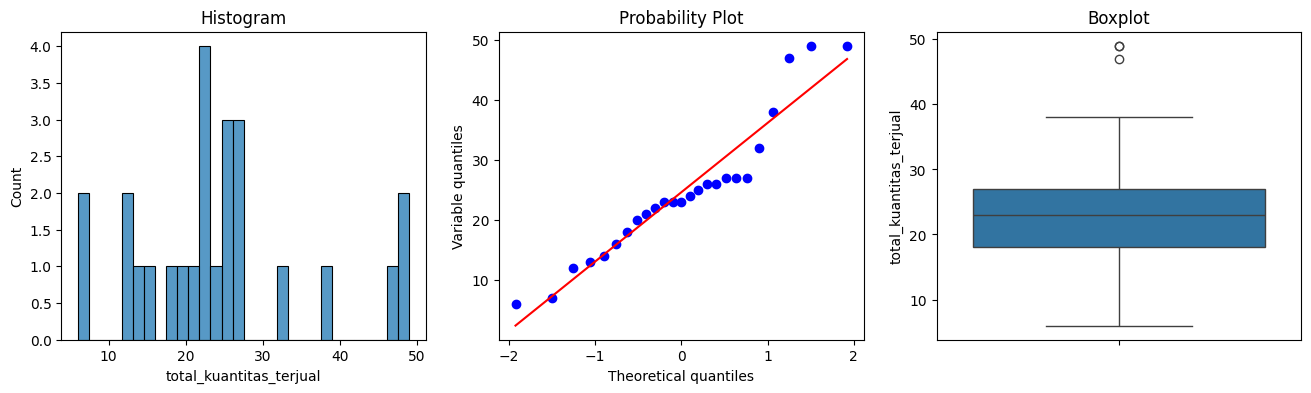

total_pendapatan_dihasilkan


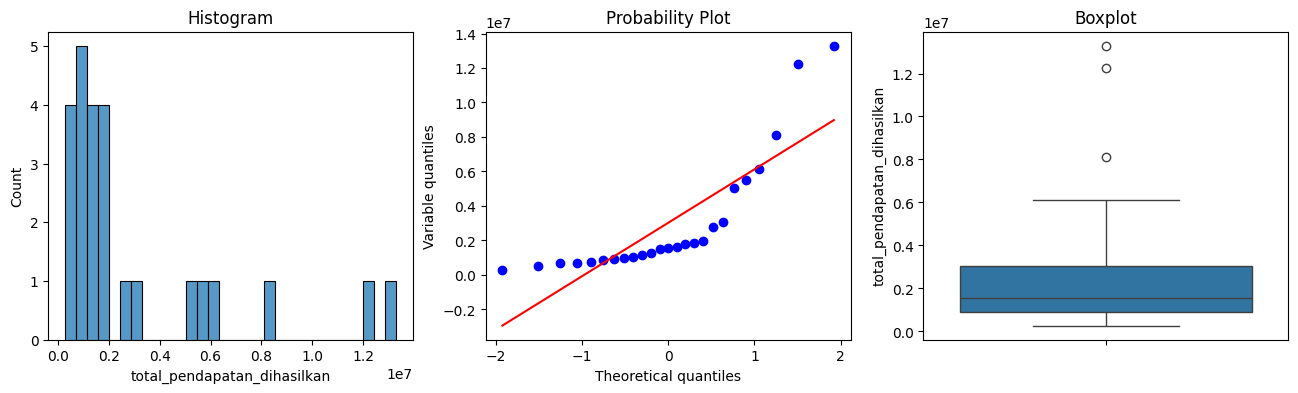

In [6]:
df_num = df.select_dtypes(include='number')
for col in df_num.columns:
    print(col)
    check_plot(df, col)

# Clustering

c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

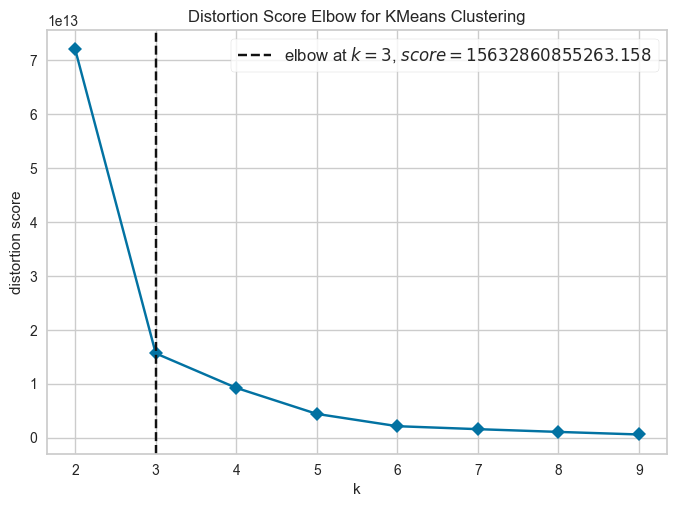

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Fitur untuk clustering
X = df[['total_pendapatan_dihasilkan']]

# Inisialisasi model KMeans
model = KMeans(random_state=42)

# Visualisasi Elbow
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
visualizer.fit(X)
visualizer.show()

c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

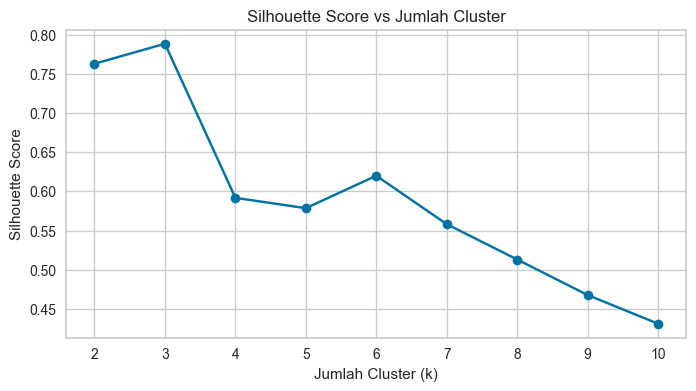

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Score vs Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

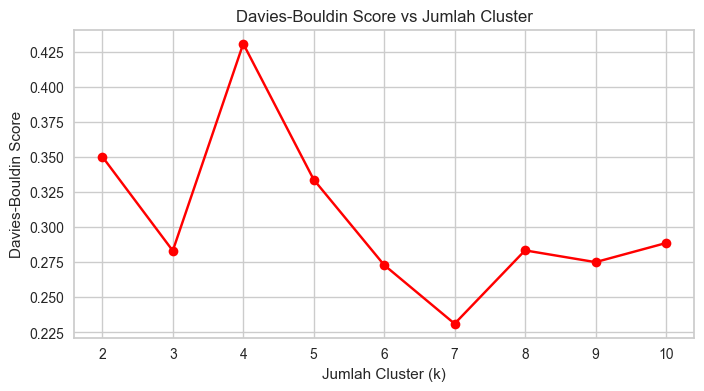

In [9]:
from sklearn.metrics import davies_bouldin_score

db_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = davies_bouldin_score(X, labels)
    db_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), db_scores, marker='o', color='red')
plt.title("Davies-Bouldin Score vs Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Davies-Bouldin Score")
plt.grid(True)
plt.show()


In [10]:
# Lakukan K-Means dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

df.head()

c:\Users\Faishal\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,nama_barang,kategori,harga_default,total_kuantitas_terjual,total_pendapatan_dihasilkan,cluster
0,Mainan Bongkar Pasang Mobil,Mainan Edukasi,85000.0,12,1020000.0,0
1,Puzzle Anak,Mainan Edukasi,45000.0,6,270000.0,0
2,Balok Kayu Warna,Mainan Edukasi,80000.0,16,1280000.0,0
3,Boneka Teddy Bear,Mainan,75000.0,26,1950000.0,0
4,RC Car Jeep,Elektronik,275000.0,20,5500000.0,1


In [11]:
df.groupby('cluster').head(5).sort_values('cluster')

,nama_barang,kategori,harga_default,total_kuantitas_terjual,total_pendapatan_dihasilkan,cluster
0,Mainan Bongkar Pasang Mobil,Mainan Edukasi,85000.0,12,1020000.0,0
1,Puzzle Anak,Mainan Edukasi,45000.0,6,270000.0,0
2,Balok Kayu Warna,Mainan Edukasi,80000.0,16,1280000.0,0
3,Boneka Teddy Bear,Mainan,75000.0,26,1950000.0,0
6,Mobil Hot Wheels,Mainan,50000.0,18,900000.0,0
4,RC Car Jeep,Elektronik,275000.0,20,5500000.0,1
18,Mainan Keyboard Mini,Elektronik,220000.0,23,5060000.0,1
21,Mainan Sains Anak,Mainan Edukasi,125000.0,49,6125000.0,1
22,Robot Remote,Elektronik,300000.0,27,8100000.0,1
5,Drone Mini,Elektronik,350000.0,38,13300000.0,2


In [12]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

labels = df['cluster']

# analisis clustering
silhouette = silhouette_score(X, labels)
calinski = calinski_harabasz_score(X, labels)
davies = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski}")
print(f"Davies-Bouldin Index: {davies}")

Silhouette Score: 0.7885048704221573
Calinski-Harabasz Index: 201.00974707608682
Davies-Bouldin Index: 0.28327995132255174


In [13]:
centroids = df.groupby('cluster')['total_pendapatan_dihasilkan'].mean().sort_values(ascending=True)

centroids

cluster
0    1.318684e+06
1    6.196250e+06
2    1.277500e+07
Name: total_pendapatan_dihasilkan, dtype: float64

In [14]:
df['tingkat_keuntungan'] = df['cluster'].map({0: 'kurang menguntungkan', 1:'cukup menguntungkan', 2:'sangat menguntungkan'})

df

,nama_barang,kategori,harga_default,total_kuantitas_terjual,total_pendapatan_dihasilkan,cluster,tingkat_keuntungan
0,Mainan Bongkar Pasang Mobil,Mainan Edukasi,85000.0,12,1020000.0,0,kurang menguntungkan
1,Puzzle Anak,Mainan Edukasi,45000.0,6,270000.0,0,kurang menguntungkan
2,Balok Kayu Warna,Mainan Edukasi,80000.0,16,1280000.0,0,kurang menguntungkan
3,Boneka Teddy Bear,Mainan,75000.0,26,1950000.0,0,kurang menguntungkan
4,RC Car Jeep,Elektronik,275000.0,20,5500000.0,1,cukup menguntungkan
5,Drone Mini,Elektronik,350000.0,38,13300000.0,2,sangat menguntungkan
6,Mobil Hot Wheels,Mainan,50000.0,18,900000.0,0,kurang menguntungkan
7,Mainan Masak-Masakan,Mainan,65000.0,47,3055000.0,0,kurang menguntungkan
8,Kereta Thomas Mini,Mainan,40000.0,25,1000000.0,0,kurang menguntungkan
9,Flashcard Binatang,Mainan Edukasi,30000.0,24,720000.0,0,kurang menguntungkan


In [15]:
df.to_sql('hasil_clustering_keuntungan_produk', engine, index=False, if_exists='replace')

25

In [16]:
df = df.sort_values(by='total_pendapatan_dihasilkan', ascending=False).reset_index(drop=True)

df.head(2)

,nama_barang,kategori,harga_default,total_kuantitas_terjual,total_pendapatan_dihasilkan,cluster,tingkat_keuntungan
0,Drone Mini,Elektronik,350000.0,38,13300000.0,2,sangat menguntungkan
1,Lego Classic Set,Mainan Edukasi,250000.0,49,12250000.0,2,sangat menguntungkan
